# Jegyzőkönyv 5 számolások

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import schemdraw
from schemdraw import logic
from schemdraw.parsing import logicparse
from sympy import symbols, Not, Or, And
from sympy.logic.boolalg import simplify_logic

ModuleNotFoundError: No module named 'schemdraw'

In [ ]:
def logic_form_print(formula) -> None:
    print(str(formula).upper().replace("|", "∪").replace("&", "∩").replace(" ", ""))

## 1. feladat: Jelzőlámpa-vezérlő

A feladat megoldásához egy NE555 által meghajtott számolót használunk, aminek a kimenete binárisan kódolja az ütemeket, ezt egy dekodolóval átalakítjuk az "ütemekre". 

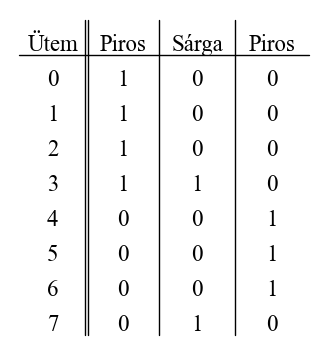

In [ ]:
# three red, then one red-amber, then three green then amber
truth_table = """
Ütem | Piros | Sárga | Piros
-------------------------------
0    | 1    | 0     | 0
1    | 1    | 0     | 0
2    | 1    | 0     | 0
3    | 1    | 1     | 0
4    | 0    | 0     | 1
5    | 0    | 0     | 1
6    | 0    | 0     | 1
7    | 0    | 1     | 0
"""

logic.Table(truth_table, colfmt='c||c|c|c', fontsize=18, font="times new roman")

### Állapotok

### Áramkör

[![Áramkör](./jegyzokonyv06/feladat1b.svg)](https://falstad.com/circuit/circuitjs.html?ctz=CQAgDOB0CMVgbAZgEyMfDzoA57ICwCchIsArCPoiGQKYC000AUNPBcmfKYciMgHY+0XiG5hmAJRAoI0fPhnI50PhAj4IFdVDJTSq0vBXDk2cBc00L6yHoBOB4caf8w5uWC8SAHiGxyuKRepNgkimwgkiwA7q7K5kx8yATgzHFJ-KmZBOrMjjlWOdgepMrezADG8SWuaOJw3rDQkCXISGGEAiKoYNqQXiwA5nXodfClEnGc3CkRhnNpGQu1i2Ye6VmK6-xc-LVTW-vmi7JLR2czSnkjiGR8iNiKd3z4kXlxLzJPMve-apszvJnj9gedHhEFN9tqlDkCoUCXBI2IpNBArvh4Ns9uZFBRtBYAGYAQwANgBnWjgn4YkJXZHYfGGehYmhQlmKCCITZEbhfMgIv6HAXPP4io6HXnXGgCPnKc5kWXSxWzWE8wizWrGE4HTba45idwSwGgqFSsGSjWkM1WjnnKV2sjM1nIvAgQjszLQMCpRgLEAAE1oJIArqSAC70Um0AOkGxwFhsPgexT0ALBX3pvhB0MRqMxuOwWxgRNulMgej4RI+1NV-iB4PEsOR6OxuQ2AbDDO16tCCt1m7divp719tM6CQjb2+r1gMeZD4gARgZ58WXmFDnIQQO3bisWzZ7xhQgQ-Y+cw8rix7xfL1Oso8uy+pzdHzeHct+vjYSJfrcTJQlwA8d-3MEDT1TdNDggisrQEP56CtaCELgoUtzQm8t3lehXzGHCATiAQ8Nw7hGDMLcz1UcwiNIqjzl4cwrQY-sNjiZjK0Y9kB2fd1uHg5NxB4h95SfQirzovc6OgkTFH4-xbz+TJJPI6CfiY8ikJ4tgIB-bhtPOXSjB0yJRP8EzFCecxTPXQDLMAw4Sg0cwwm4bi4hcyhnNtKDNk-dMPJAiQAEkynTO1oEQZ1OV0GhmBC+AxwfK87VsfE4rEMdX2S98Yr0eK+wgO94zAOxYvyh41yvHKSrS8qxFkq8XVy9KEoEpcryQ5q6ok8SVK6jLnEK8SkWa6AnSXSjDEMv8NAsPQxtgOy60czyLDUWKFqXP44LUhpqDIAZvCO46S1ioA)

[Régi](https://falstad.com/circuit/circuitjs.html?ctz=CQAgDOB0CMVgbAZgEyMfDzoA57ICwCchIsArCPoiGQKYC000AUNPBcmfKYciMgHY+0XiG5hmAJRAoI0fPhnI50PhAj4IFdVDJTSq0vBXDk2cBc00L6yHoBOB4caf8w5uWC8SAHiGxyuKRepNgkimwgkiwA7q7K5kx8yATgzHFJ-KmZBOrMjjlWOdgepMrezADG8SWuaOJw3rCIkIgCYO3E2NAouEiKYJBeLADmdeh18KUScZzcKRGGC2kZS7XLZh7pWYqb-Fz8tTM7h+bLsisnF3NKeWOIZHyI2IoPfPiReXFvMi8yj-81NsLvJXn9QZdnhEFL9dqljiCYSCXBI2IpNBAbvh4LsDuZFBRCdYAGYAQwANgBnWiQv5YkI3VHYQmGeg4mgwtkDGTbIjcH5kJEA46C14A0UnY58240AT85SXMhymVK+bw3mEea1YxnI7bHWnMTuSXA8Ew6UQqWa0jm61cy7S+1kVns1F4EC8cyMQzQLxenIgAAmtDJAFdyQAXejk2iB0g2OAsNh8T0gegBYLG9OYoMh0nhqMxuOwWC2MBJ92p+j4RJ+tM1-i5sOR6OxiylxPMMZMCbVxI4RR9mxdgy9jNMP7Z4fdnrcb3CAdpzJfTP+n2zpeGY6+rPjjdT7d1oc9ucN47wIRKEACAEoS7tQfsh9LmHHZ+MGFy-2v-WXiDPlcLz4e131dX9gLvd871RAEv03PgAggedLAsPQ4irTJEPg+9bz4G9gIzN8ASnOCD22UjrQEXtrTfajuCohpaIaAD7zAQdIIVehoPIziOKQ1QtjiUiBOvTiRJgvCJkoqYPQabk0I9QxrUIVkz22FTgIbKs1LiIDZLEWoaPAsRFGfMDdMvESpkSMxWMUJ8JnMgzzEoiZl3ItzbOsspBOvGTlKU8RWABbA7wbXB0VKPhCWMtgICwuLLgSlwsKc1LFFCvgnPwq9MqvY4IsocwSg0XySqK-wMzI9DbKncqyKAA)

## 2. feladat: Dobókocka

```mermaidjs
---
title: Lámpa
---
stateDiagram-v2
    direction LR
    [*] --> Piros1 : Alap állapot

    Piros1 --> Piros2 : Órajel
    Piros2 --> Piros3 : Órajel
    Piros3 --> PirosSarga : Órajel
    PirosSarga --> Zold1 : Órajel
    Zold1 --> Zold2 : Órajel
    Zold2 --> Zold3 : Órajel
    Zold3 --> Sarga : Órajel
    Sarga --> Piros1 : Órajel
```

![Állapotok](./jegyzokonyv06/feladat1-allapotok.png)

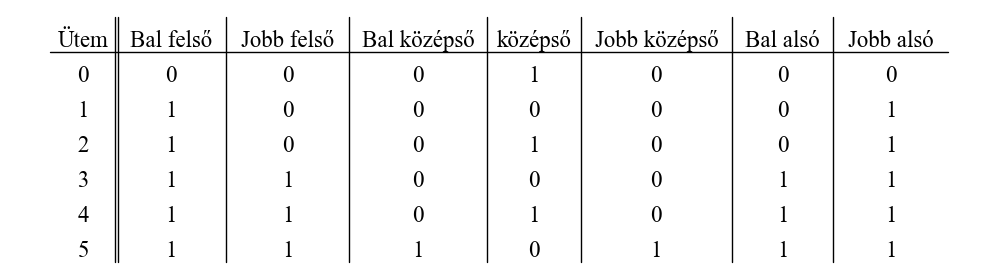

In [ ]:
a1, a0, b1, b0 = symbols('a1,a0,b1,b0')

truth_table = """
Ütem | Bal felső | Jobb felső | Bal középső | középső | Jobb középső | Bal alsó | Jobb alsó
--------------------------------------------------------------------------------------------
0    | 0         | 0          | 0           | 1       | 0            | 0        | 0
1    | 1         | 0          | 0           | 0       | 0            | 0        | 1
2    | 1         | 0          | 0           | 1       | 0            | 0        | 1
3    | 1         | 1          | 0           | 0       | 0            | 1        | 1
4    | 1         | 1          | 0           | 1       | 0            | 1        | 1
5    | 1         | 1          | 1           | 0       | 1            | 1        | 1
"""

logic.Table(truth_table, colfmt='c||c|c|c|c|c|c|c', fontsize=18, font="times new roman")

### Állapotok
```mermaid
---
title: Dobókocka
---
stateDiagram-v2
    direction LR
    [*] --> 1 : Alap állapot

    1 --> 2 : Órajel lenyomott gombbal
    1 --> 1 : Órajel gomb nélkül
    2 --> 3 : Órajel lenyomott gombbal
    2 --> 2 : Órajel gomb nélkül
    3 --> 4 : Órajel lenyomott gombbal
    3 --> 3 : Órajel gomb nélkül
    4 --> 5 : Órajel lenyomott gombbal
    4 --> 4 : Órajel gomb nélkül
    5 --> 6 : Órajel lenyomott gombbal
    5 --> 5 : Órajel gomb nélkül
    6 --> 1 : Órajel lenyomott gombbal
    6 --> 6 : Órajel gomb nélkül
```

![Állapotok](./jegyzokonyv06/feladat2-allapotok.png)

### Áramkör

[Régi](https://falstad.com/circuit/circuitjs.html?ctz=CQAgDOB0CMVgbAZgEyMfDzoA57ICwCchIsArCPoiGQKYC000AUNPBcmfCI98gOzIebENzDMASiBQR68fNOSzCY8JQgUIWyGUmloQ+vmz7D2LWvwa123QCdTPY44vQw78QA8Q5nsiFustAkCiISLADuLo4i4lFMAdwJiuDMDskojr4QBh7iAMZZOQakyCbaebDIkPhsqOy1AvjNZNRgkO4sAOYxZTHwFnEgnElJJbHM8SW+-grZk8MEPhAjy6lRs2ubyUPbJas7zD2IZAH83CdCSuXr0qek53cBzbcyPPLS2ApyCkOIX+8FP9QmIFm8fopZM5xGwFFYVlxKB9ViZfmpNCAAGYAQwANgBnWivAHOeGUcqsbAUMglCFkF4QiCIBZEC73elA+5DDlPGgvTZDVmQmiPN7c0VKEV8JaClTDbAmAYmMoUqJK+WKsDKmVggEQoWMllyum0j4wvCkdwmRglQh9G1XEAAE1oOIArriAC70XG0J2kGxwSIgfhgb4fUPfQ5qwRqSM2BbwWMQ+OGmOGTKpzJDfjoYR9XOqHN5iDxrQLLNCQSybOJ2Ny+AKkByoZJoQRsOiX4VzsRxtd1J1UrOETQFAmERCF3ur0+v0BwYdFhDhI1gK5HgzZ2u7Ee72+-2wRdgFjpK3CcZgREOtSBcRnrVOCdX7hGG53tKWx+jl+kVQf9IlCCcYCGtHYv3vUp3CfYdrWhCDP1yHIklAv9bw8RCN3oTJVzQnIMKmSVRyAvCFiQmDyImeISJvci31uNxr2SRjX2hMjf3oljSPiX9Rw3KjRCbAxFSbYFbkbEwxLJMTBWgqS5K5HsoxKVMBSUvwlmwTJ6DUqJCFpYJ10lRg7QYrDDNMWR5iiQt8xMWydMfYtX2uHxtNc1smzlc4TBbCt+z7MCBluHzhGCrTDDYcspFwvjJTNSxrEXXRoFaNzItM-SMqECBQkgbAsHwMgVCIfh+C4fBzgYSUUotQI4N8+1nCnHc9znQ9A3aE9WDq88RDtCc+G3Gd93nI8bCXHqAlQzjxxglqRvahcJu6lcZuYuabwW3dZwPZaKmDNtShEic+hzTsbwGi8crIxBTNHO7IuCoYxz6B77tBeJHrCiArt4cs9PtKLmyBkoXs2kd0ChVVSChii4bNW7go+LKByGP7nFR+j0dpTGSlrPSShR-GboASR8ZFNLlAUoGpOshEybARFrVLqCZlCTGwOVhMsGgaAWLmOZB06Yaunmxc+2HQYCRBHhvcG5Y2x4eYVoWxbO-zfO4ULgZzftgfZv8AZDAKFH4AFEZsi2zYBaAXhzW2XkNu3uyiQ25UNgmfGppZUd05t9l9onXZNwbS37f3Qs2XAFDU-F1Fy1FoJd28sTxQkWWTl4yVWcQgA)
[![Áramkör](./jegyzokonyv06/feladat2a.svg)](https://falstad.com/circuit/circuitjs.html?ctz=CQAgDOB0CMVgbAZgEyMfDzoA57ICwCchIsArCPoiGQKYC000AUNPBcmfCI98gOzIebEN3yRik4mTCy5LAEogUEevHzLkqwtwgR8ECnqhlmSpkPr5spaJezH9h8C7CRTAJ1uXr316TkwZgAPEAceZCFoWWESDREFFgB3PwgLUl1mFPSRdJRwZi88qLsw4ztA5gBjP3Cc5Bs9SEDYRBhCdGxOMEQugw64MBYAcz87Gxz4RyyQTm5c0pEg7NLwyI1w5dmCMtmuXa313aP0w530udTmUcQyKP5uW6EtRoKUp9IH5TvSfA0tlQ8dTKbAaNT-Ga9MHAqEZN6aVQwrQ8XxBNgaAwQS74YGXGz-fwUABmAEMADYAZ1o8NhvkxlEarGwFDIpXBND+QIJiBmREePzInI+W0FGg+ou2EJSfIRNC+gJF8uRZC+Ry2MoaNimNk18O1s2wWrAOp2ANBXMoOgt6qt7NZlmBaLwIB0qhyYAMwlKQgAJrRSQBXMkAF3oZNoPtI-jcQxm-A9Lu4gggVqdUXQaXmDUzsxAfsDIbDEajjmaLDYJR+9Dq0Cr+V9-pJQdD4cjsFLsaKHrdi2NNkYpTSckKAU9VgmfZRr2ishH0U9uUnSwCs6KqEs9XCA6EQ9XpHXU-3W9RK6Ca-yuWzcN3Z9sdcrUV0p5mTB+l4vmWyB-H+4-8Ls+Tbr+PiMtkk5AdEhqHlskH9r4sHXi+S7zLWj7wsmR4gBhsJbPAUG0jEOG8oR5r0sKrDOq6h7zqovgNgWLbFu2rhlhRQhUYuC58HmjbNkWbbRqxFakBm1FXj+9FNoWrYlixsbCdAokQeJFw8Qx-GyU0sYpPG8QNFhyLjAUFKUDEdIxNAnLGKSlK0MRaScvSlxBAAkqIggWrp1omDQzBufAHn0PkXlBTuPmmP5HkQF5pYsn57lCMFCb5E0cWRUIwJeY64XxQF7FJgmqY5elmFeUZqW+SVbDRQm1UsWlBkQLCeE2DhOU6QmmXIo6cbJUI2E7r1BIYXoQ08MFyKhehCbshh7JBKMr5oUtDKuKwrJhMCjBfIQbLQF8TUuKYOmTV1bqEINJ3nUIuBgtAF3oci0XoGtOkvc93DbZ+WEvV9m13QdcbdRo-A-D1OlgyDVZ1VsoMblM-3CAjWy7RuXwrX9MGocI6PY9Wo1XZ55rzXGxPpFRQGw+aAjpgjNP-qJ9OKQjSyk3dpT8MT4NYVzIPU1F8XYCIVqgjYRVuHFKSi4eFOoi+iA7fMCufXL2TK9RSly7WsBC-MCO3RkxjUIYQMpkmL2pnGFvm-MgNvbb3C65831w6IUOPgTWFvvruTI6bmhYXhAew0HwVB5ZUqBxMnJOxH6HW2EwvfQbdUcX7Uu+CLvg-ls0tWopivwmnZs5ijLMs4gD0w-LVcVw9lM1xuixKaczBAA)